In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [69]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [5]:
data_folder = 'sun_azimuth/'

az_files = glob.glob(data_folder + "sun*") #This command grabs all of the files starting with "sun_az" in your data folder.
az_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
az_files.remove('sun_azimuth/sun0_-6.dat')

In [31]:
az_files = ['sun_azimuth/sun-9_0.dat', 'sun_azimuth/sun-8_0.dat', 'sun_azimuth/sun-7_0.dat', 'sun_azimuth/sun-6_0.dat', 'sun_azimuth/sun-5_0.dat',
 'sun_azimuth/sun-4_0.dat', 'sun_azimuth/sun-3_0.dat', 'sun_azimuth/sun-2_0.dat', 'sun_azimuth/sun-1_0.dat',
 'sun_azimuth/sun0_0.dat', 'sun_azimuth/sun1_0.dat', 'sun_azimuth/sun2_0.dat', 'sun_azimuth/sun3_0.dat',
 'sun_azimuth/sun4_0.dat', 'sun_azimuth/sun5_0.dat', 'sun_azimuth/sun6_0.dat', 'sun_azimuth/sun7_0.dat',
 'sun_azimuth/sun8_0.dat', 'sun_azimuth/sun9_0.dat', 'sun_azimuth/sun10_0.dat']
el_files = ['sun_elevation/sun_el_m5','sun_elevation/sun_el_m4','sun_elevation/sun_el_m3',
           'sun_elevation/sun_el_m2','sun_elevation/sun_el_m1','sun_elevation/sun_el_p1',
           'sun_elevation/sun_el_p2','sun_elevation/sun_el_p3','sun_elevation/sun_el_p4',
           'sun_elevation/sun_el_p5','sun_elevation/sun_el_p6','sun_elevation/sun_el_p7',
            'sun_elevation/sun_el_p8','sun_elevation/sun_el_p9','sun_elevation/sun_el_p10']

In [63]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans


for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        row_count = 0
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                row_count += 1
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec)/row_count # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)
        

In [64]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans


for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        row_count = 0
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                row_count += 1
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec)/row_count # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)
        

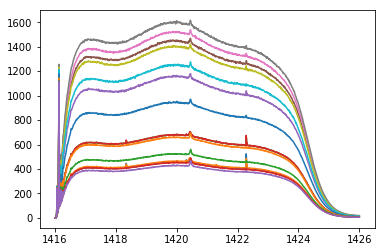

In [80]:
freq = np.linspace(1416,1426,1024)
for i in range(15):
    plt.plot(freq,el_spectra[i])
#     plt.plot(freq[100:750],el_spectra[10][100:750])
plt.show()

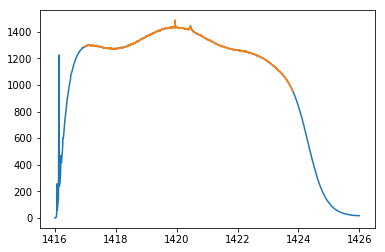

In [82]:
freq = np.linspace(1416,1426,1024)
plt.plot(freq,az_spectra[10])
plt.plot(freq[100:800],az_spectra[10][100:800])
plt.show()

In [65]:
# Trunctuate the spectra
cut_az_spectra = []
for i in range(20):
    cut_az_spectra.append(az_spectra[i][100:750])
cut_el_spectra = []
for i in range(15):
    cut_el_spectra.append(el_spectra[i][100:750])

In [66]:
# Get the average flux at a certain delta el and az
avg_cut_az_flux = np.mean(cut_az_spectra,axis=1)
avg_cut_el_flux = np.mean(cut_el_spectra,axis=1)
print(avg_cut_az_flux,avg_cut_el_flux)

[  422.234302     423.50565851   423.22476072   452.79705089   458.32794586
   471.92232683   811.1006153    841.76557015   873.79417866  1248.5549829
  1311.98722202  1401.55424356  1084.83791698  1030.88416571   932.6138732
   647.99004297   494.9119151    443.98594255   413.95106494   422.81029473] [  420.13868107   427.40812972   623.59807077   624.2548807   1060.35101231
  1327.1654084   1392.46861955  1465.46269077  1283.86616967  1144.73795778
   865.28354615   603.89291404   480.39785554   415.44500088   393.48709515]


In [60]:
az_range = np.arange(-9,11,1)
el_range = list(np.arange(-5,11,1))
el_range.remove(0)
print(az_range,el_range)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


a=1174.04665457, x0=1.32302113878, sigma=5.15163288824
FWHM is 12.1320954518


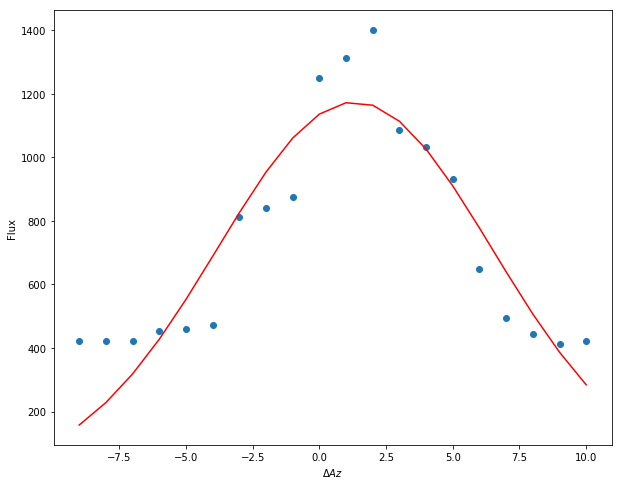

In [74]:
plt.figure(figsize=[10,8])
plt.scatter(az_range,avg_cut_az_flux)

# ...and provide initial estimates for the parameters
a0,x0,sigma0 = (1000,2.5,2)

# exectute the curve fit...
coeffs, fiterr = curve_fit(gauss_function, az_range, avg_cut_az_flux, p0=(a0,x0,sigma0))

# ...and plot the results
print ("a=%s, x0=%s, sigma=%s" % (coeffs[0], coeffs[1], coeffs[2]))
print ("FWHM is %s" % (coeffs[2]*2.355))
plt.plot(az_range,gauss_function(az_range,*coeffs),'r')

plt.ylabel('Flux')
plt.xlabel('$\Delta Az$')
plt.show()

a=1395.42098368, x0=2.28493724138, sigma=4.09624959688
FWHM is 9.64666780065


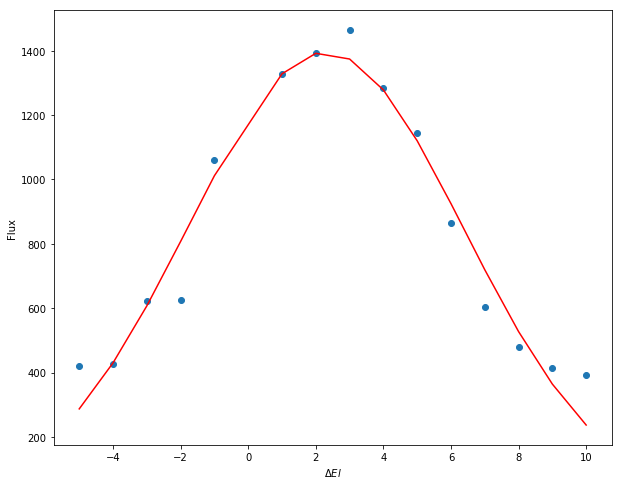

In [75]:
plt.figure(figsize=[10,8])
plt.scatter(el_range,avg_cut_el_flux)

# ...and provide initial estimates for the parameters
a0,x0,sigma0 = (1000,2.5,2)

# exectute the curve fit...
coeffs, fiterr = curve_fit(gauss_function, el_range, avg_cut_el_flux, p0=(a0,x0,sigma0))

# ...and plot the results
print ("a=%s, x0=%s, sigma=%s" % (coeffs[0], coeffs[1], coeffs[2]))
print ("FWHM is %s" % (coeffs[2]*2.355))
plt.plot(el_range,gauss_function(el_range,*coeffs),'r')

plt.ylabel('Flux')
plt.xlabel('$\Delta El$')
plt.show()

In [84]:
# Calculate diffraction limit of SRT at 21 cm
D = 2.1
wl = 3*10**8/(1421*10**6)
df_limit = 1.22*wl/D # Diffraction limit in rad
df_limit = df_limit*180/np.pi #Convert to degree
print(df_limit)

7.02732994932748


In [79]:
# Calculate the angular size of the sun
R_sun = 7e8    # meters
AU = 1.496e11  # meters
theta = 2*R_sun/AU*180/np.pi
print(theta)
# Can't determine the size of the sun from this experiment
# We are actually just measuring the beam size using an infintesimally small source.

0.5361904499887382
